Logistic Regression
k-Nearest Neighbors
Decision Trees
Support Vector Machine
Naive Bayes

I suppose we build the model from scratch?
Do we need to preprocess the data? Are there some highly correlated variables?
feature selection.
SVM 


In [37]:
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
from sklearn import svm
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from mlxtend.plotting import plot_decision_regions

df = pd.read_csv("npf_train.csv")
df
df = df.set_index("date")


<Figure size 2160x1440 with 0 Axes>

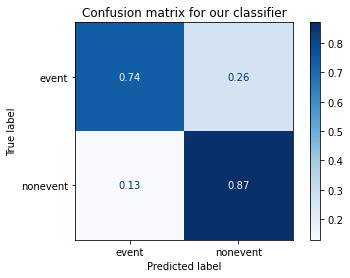

[[3.15000000e+02 0.00000000e+00 3.70077551e+02 ... 6.90409018e-01
  1.67152725e-03 4.85027892e-04]
 [4.52000000e+02 0.00000000e+00 4.01099775e+02 ... 4.82913578e-01
  4.91383679e-03 1.15580454e-03]
 [3.59000000e+02 0.00000000e+00 3.77448880e+02 ... 5.58320064e-01
  6.15891358e-03 7.96902808e-04]
 ...
 [3.60000000e+02 0.00000000e+00 3.81123937e+02 ... 3.41716681e-01
  3.03757595e-03 1.24416938e-03]
 [2.10000000e+01 0.00000000e+00 3.61574537e+02 ... 7.24346747e-01
  4.24648673e-03 9.65462300e-04]
 [3.49000000e+02 0.00000000e+00 3.78386316e+02 ... 9.23022952e-01
  4.76832054e-03 1.95954151e-03]]
accuracy_score:  0.8043478260869565
['event' 'nonevent' 'event' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'event' 'event' 'nonevent' 'event' 'event' 'nonevent' 'nonevent' 'event'
 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'event' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'event' 'event'
 'nonevent' 'event' 'event' 'event' 'event' 'nonevent' 'event' 'nonevent'
 

In [38]:
class2 = np.array(["event"]*df.shape[0],dtype="object")
class2[df["class4"]=="nonevent"] = "nonevent"
df["class2"] = class2
df["class2"] = df["class2"].astype("category")

plt.figure(figsize=(30,20))

dataset = pd.read_csv("npf_train.csv")
class2 = np.array(["event"]*dataset.shape[0],dtype="object")
class2[dataset["class4"]=="nonevent"] = "nonevent"
dataset["class2"] = class2
dataset["class2"] = dataset["class2"].astype("category")
# dataset.class2[dataset.class2 == 'event'] = 1
# dataset.class2[dataset.class2 == 'nonevent'] = 0
dataset["class2"] = pd.get_dummies(dataset["class2"])
y = df.class2
X = df.drop(["class2", "class4"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Predict the test set
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

# Get support vectors
support_vectors = clf.support_vectors_
print(support_vectors)
print("accuracy_score: ", accuracy_score(y_test, y_pred))
print(y_pred)

clf_rbf = svm.SVC(kernel='rbf', C=1e-11, gamma=1)
clf_rbf =clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

support_vectors = clf_rbf.support_vectors_
print(support_vectors)
print("accuracy_score svm_rbf: ", accuracy_score(y_test, y_pred_rbf))
print(dataset)

# Generate confusion matrix
# matrix = plot_confusion_matrix(clf_rbf, X_test, y_test,
#                                  cmap=plt.cm.Blues,
#                                  normalize='true')
# plt.title('Confusion matrix for our classifier')
# plt.show(matrix)
# plt.show()

# Get support vectors


Select features from dataset based on correlation.

In [49]:
cor = dataset.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()

cor_target = abs(cor["class2"])

relevant_features = cor_target[cor_target>0.5]
print("relevant features: ", relevant_features)
relevant_features = relevant_features[:-1]

features = []
for i in relevant_features.index:
    features.append(i)
X_selected_improved = X[features]

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected_improved, y, test_size=0.2, random_state=42)
clf_selected = svm.SVC(kernel='linear').fit(X_train_selected, y_train_selected)
y_pred_selected = clf_selected.predict(X_test_selected)
print("accuracy_score svc selected: ", accuracy_score(y_test_selected , y_pred_selected))

clf_logistic_selected = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_selected,y_train_selected)
y_pred_selected_logistic = clf_logistic_selected.predict(X_test_selected)
print("BEST SCORE: ")
print("accuracy_score logistic selected: ", accuracy_score(y_test_selected , y_pred_selected_logistic))

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train_selected)
X_train_selected = scaler.transform(X_train_selected)
X_test_selected = scaler.transform(X_test_selected)

y_pred_selected = clf_selected.predict(X_test_selected)
print("accuracy_score svc selected: ", accuracy_score(y_test_selected , y_pred_selected))

clf_logistic_selected = LogisticRegression(random_state=42, max_iter=1000).fit(X_train_selected,y_train_selected)
y_pred_selected_logistic = clf_logistic_selected.predict(X_test_selected)
print("BEST SCORE: ")
print("accuracy_score logistic selected: ", accuracy_score(y_test_selected , y_pred_selected_logistic))



relevant features:  Glob.mean         0.548786
PAR.mean          0.526778
RGlob.mean        0.553629
RGlob.std         0.500148
RHIRGA168.mean    0.586945
RHIRGA168.std     0.544019
RHIRGA336.mean    0.585810
RHIRGA336.std     0.529466
RHIRGA42.mean     0.590105
RHIRGA42.std      0.554353
RHIRGA504.mean    0.585578
RHIRGA504.std     0.511591
RHIRGA672.mean    0.582355
RHIRGA84.mean     0.590483
RHIRGA84.std      0.546968
class2            1.000000
Name: class2, dtype: float64
accuracy_score svc selected:  0.8369565217391305
BEST SCORE: 
accuracy_score logistic selected:  0.8478260869565217
accuracy_score svc selected:  0.5
BEST SCORE: 
accuracy_score logistic selected:  0.782608695652174


/Users/anniinasainio/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Tune hyperparameters for logistic regression

In [43]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_selected, y_train_selected)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.817843 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [44]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_selected, y_train_selected)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.785936 using {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.742518 (0.058066) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.742518 (0.058066) with: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'distance'}
0.758609 (0.071505) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.756782 (0.072582) with: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.762337 (0.075967) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.774149 (0.079965) with: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.781431 (0.078277) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
0.785936 (0.077696) with: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
0.770546 (0.075030) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
0.783283 (0.081460) with: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
0.762312 

In [45]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_selected, y_train_selected)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.815941 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.813338 (0.074150) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.815941 (0.068945) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.678403 (0.083833) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.790541 (0.079820) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.788514 (0.083045) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.686637 (0.088193) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.764139 (0.078877) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.764014 (0.081569) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.612362 (0.137183) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.752252 (0.084181) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.753904 (0.080641) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.653904 (0.053353) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.721446 (0.090451) with: {'C': 0.01, 'gamma': 'scale', 

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
# define dataset
# define models and parameters
model = BaggingClassifier()
n_estimators = [10, 100, 1000]
# define grid search
grid = dict(n_estimators=n_estimators)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_selected, y_train_selected)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.778629 using {'n_estimators': 1000}
0.764114 (0.069777) with: {'n_estimators': 10}
0.777703 (0.068121) with: {'n_estimators': 100}
0.778629 (0.075742) with: {'n_estimators': 1000}


In [48]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_selected, y_train_selected)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.791291 using {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000, 'subsample': 0.5}
0.755205 (0.086967) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.5}
0.756131 (0.089052) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 0.7}
0.736161 (0.087826) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 10, 'subsample': 1.0}
0.783183 (0.074164) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
0.787713 (0.071049) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}
0.764089 (0.070075) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
0.782282 (0.069750) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}
0.789565 (0.066405) with: {'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.7}
0.781406 (0.066819) with: {'learning_rate': 0.001, '

relevant features:  Glob.mean         0.548786
PAR.mean          0.526778
RGlob.mean        0.553629
RGlob.std         0.500148
RHIRGA168.mean    0.586945
RHIRGA168.std     0.544019
RHIRGA336.mean    0.585810
RHIRGA336.std     0.529466
RHIRGA42.mean     0.590105
RHIRGA42.std      0.554353
RHIRGA504.mean    0.585578
RHIRGA504.std     0.511591
RHIRGA672.mean    0.582355
RHIRGA84.mean     0.590483
RHIRGA84.std      0.546968
Name: class2, dtype: float64


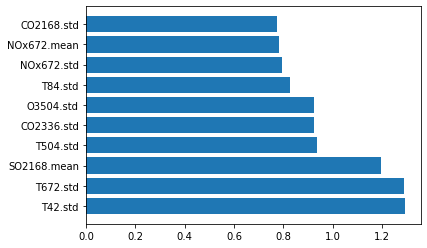

['T42.std', 'T672.std', 'SO2168.mean', 'T504.std', 'CO2336.std', 'O3504.std', 'T84.std', 'NOx672.std', 'NOx672.mean', 'CO2168.std']
['T42.std', 'T672.std', 'SO2168.mean', 'T504.std', 'CO2336.std', 'O3504.std', 'T84.std', 'NOx672.std', 'NOx672.mean', 'CO2168.std']


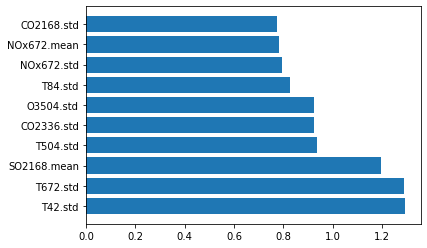

['T42.std', 'T672.std', 'SO2168.mean', 'T504.std', 'CO2336.std', 'O3504.std', 'T84.std', 'NOx672.std', 'NOx672.mean', 'CO2168.std']
            CO2168.std  CO2336.std  NOx672.mean  NOx672.std  O3504.std  \
date                                                                     
2000-01-01    2.284996    2.135062     2.046154    0.582405   1.888020   
2000-01-20    0.415185    0.385179     2.774557    0.883372   1.557784   
2000-01-23    0.189497    0.172958     0.749506    0.096965   0.337514   
2000-02-17    1.934180    1.946536     3.089818    1.178090   5.417415   
2000-03-25    1.096617    1.047750     0.833987    0.174832   2.780791   

            SO2168.mean   T42.std  T504.std  T672.std   T84.std  
date                                                             
2000-01-01     1.070769  0.375244  0.436362  0.525698  0.376324  
2000-01-20     0.196795  0.618068  0.428726  0.373927  0.575679  
2000-01-23     0.158171  1.243517  1.071755  0.965988  1.238891  
2000-02-17     0.21

In [40]:
from sklearn import svm



def f_importances(coef, names, top=-1):
    selected_features = []
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))
    
    # Show all features
    if top == -1:
        top = len(names)
    
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()
    selected_features = list(names[::-1][0:top])
    print(selected_features)
    return selected_features
# whatever your features are called
feature_names =  list(X_train.columns)
print("relevant features: ", relevant_features)
svm2 = svm.SVC(kernel='linear')
svm2.fit(X_train, y_train)

print(f_importances(abs(clf.coef_[0]), feature_names, top=10))

X_selected = X[X.columns[X_train.columns.isin(f_importances(abs(clf.coef_[0]), feature_names, top=10))]]

print(X_selected.head())

features = []
for i in relevant_features.index:
    features.append(i)


X_selected_improved = X[features]



X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected_improved, y, test_size=0.2, random_state=42)

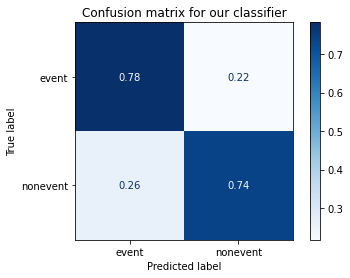

[[0.68876037 0.6409687  0.58826087 ... 0.39804548 0.39230304 0.36853647]
 [5.73092136 5.15910338 0.68382883 ... 1.85598125 1.85810518 2.04088849]
 [1.39987867 1.36550517 0.48980198 ... 1.33931741 1.33687419 1.41385453]
 ...
 [4.1821623  3.76470963 1.29855263 ... 1.80781941 1.72096355 2.80813183]
 [6.19809419 5.99271845 0.235      ... 2.97752154 2.80987796 3.48084704]
 [1.14584107 1.08204872 3.43774194 ... 1.91346748 1.86635566 1.99697567]]
accuracy_score3 rbf:  0.6956521739130435
['event' 'event' 'event' 'event' 'nonevent' 'nonevent' 'nonevent' 'event'
 'event' 'nonevent' 'nonevent' 'event' 'nonevent' 'nonevent' 'nonevent'
 'event' 'nonevent' 'nonevent' 'event' 'event' 'nonevent' 'nonevent'
 'event' 'nonevent' 'nonevent' 'nonevent' 'event' 'nonevent' 'nonevent'
 'event' 'event' 'event' 'nonevent' 'nonevent' 'event' 'event' 'event'
 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent' 'nonevent'
 'nonevent' 'nonevent' 'nonevent' 'event' 'event' 'nonevent' 'event'
 'nonevent' 'nonevent

In [41]:
from sklearn.linear_model import LogisticRegression

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# Predict the test set

clf_logistic = LogisticRegression(random_state=42, max_iter=1000).fit(X_train2, y_train2)
y_pred_logistic = clf_logistic.predict(X_test2)
clf2 = svm.SVC(kernel='linear')
model = svm.SVC(kernel='linear', C=1, gamma=1) 

model_rbf = svm.SVC(kernel='rbf', C=100, gamma=1)
clf2 = model.fit(X_train2, y_train2)
clf3 = model_rbf.fit(X_train2, y_train2)
y_pred3 =clf3.predict(X_test2)

# Generate confusion matrix
matrix2 = plot_confusion_matrix(clf2, X_test2, y_test2,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion matrix for our classifier')
plt.show(matrix2)
plt.show()

# Get support vectors
support_vectors2 = clf2.support_vectors_
print(support_vectors2)

print("accuracy_score3 rbf: ", accuracy_score(y_test2, y_pred3))
print(y_pred3)
print("accuracy_score logistic: ", accuracy_score(y_test2, y_pred_logistic))



# cor_target = abs(cor["class2"])

# relevant_features = cor_target[cor_target>0.5]
# print(relevant_features)
